### 3장 사이킷런을 타고 떠나는 머신 러닝 분류 모델 투어
- 3.1 분류 알고리즘 선택
- 3.2 사이킷런 첫걸음: 퍼셉트론 훈련
- 3.3 로지스틱 회귀를 사용한 클래스 확률 모델링
- 3.4 서포트 벡터 머신을 사용한 최대 마진 분류
- 3.5 커널 SVM을 사용하여 비선형 문제 풀기
- 3.6 결정 트리 학습
- 3.7 k-최근접 이웃: 게으른 학습 알고리즘
---- 

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
## iris dataset load 
from sklearn import datasets 
iris = datasets.load_iris()
x = iris.data[:, [2,3]]
y = iris.target
print('target class =', np.unique(y))

target class = [0 1 2]


----
#### 1. sklearn을 사용한 perceptron 학습 
----

In [3]:
## 1) train/test set split -> 2) 변수 표준화 -> 3) fit perceptron -> 4) evaluation

from sklearn.model_selection import train_test_split
## train,test 데이터에 target class 비율(0,1,2)을 동일하게 맞춰준다 : stratify = y
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42, stratify = y)

print(np.bincount(y))
print(np.bincount(y_train))
print(np.bincount(y_test))

[50 50 50]
[35 35 35]
[15 15 15]


In [4]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
sc.fit(x_train)
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)

<AxesSubplot:ylabel='Density'>

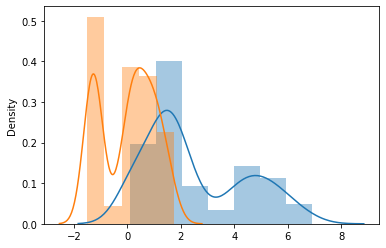

In [5]:
sns.distplot(x_train)
sns.distplot(x_train_std)

In [6]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(eta0 = 0.1, random_state = 42) ## eta0 : 학습율 
ppn.fit(x_train_std, y_train)

print('train accuracy =', ppn.score(x_train_std, y_train))
print('test accuracy =', ppn.score(x_test_std, y_test))

train accuracy = 0.9238095238095239
test accuracy = 0.8444444444444444


In [7]:
## 시각화를 위한 plot_decision_regions 함수 
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # 마커와 컬러맵을 설정합니다.
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # 결정 경계를 그립니다.
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor=None if idx==1 else 'black')

    # 테스트 샘플을 부각하여 그립니다.
    if test_idx:
        # 모든 샘플을 그립니다.
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    facecolor='none',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

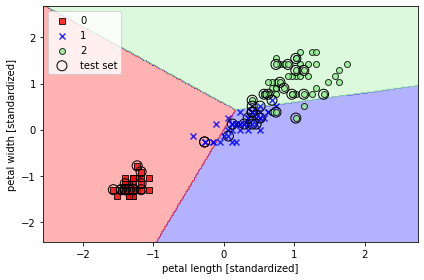

In [8]:
X_combined_std = np.vstack((x_train_std, x_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=ppn, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout() # plt.savefig('img/03_01.png', dpi=300)
plt.show()

- 위와같이 퍼셉트론은 선형적으로 구분되지 않는 데이터에 잘 수렴하지 못함. 때문에 실적에서 보통 사용되지 않음 
--- 

#### 2. Logistic Regression
----

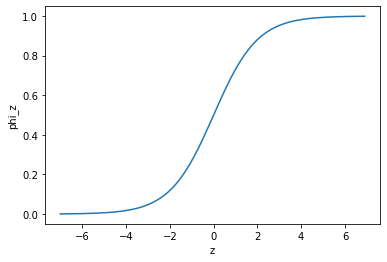

In [9]:
### sigmoid function : z값이 양수이면 1, 음수이면 0에 수렴함 
def sigmoid(z): 
    return 1.0 / (1.0+np.exp(-z))

z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)

plt.plot(z, phi_z)
plt.xlabel('z')
plt.ylabel('phi_z')
plt.show()

train accuracy = 0.9714285714285714
test accuracy = 0.9333333333333333


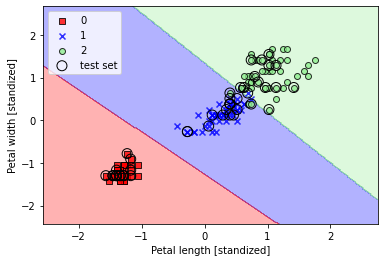

In [10]:
from sklearn.linear_model import LogisticRegression 
lr = LogisticRegression(C=100.0, random_state = 42) ## C : overfitting 방지를 위한 가중치 규제 수준.(작을수록 규제가 강해짐)
lr.fit(x_train_std, y_train)

print('train accuracy =', lr.score(x_train_std, y_train))
print('test accuracy =', lr.score(x_test_std, y_test))

plot_decision_regions(X_combined_std, y_combined, classifier = lr, test_idx = range(105, 150))
plt.xlabel('Petal length [standized]')
plt.ylabel('Petal width [standized]')
plt.legend()
plt.show()

---
#### 3.SVM (Support Vector Machine) 
---

train accuracy = 0.9809523809523809
test accuracy = 0.9111111111111111


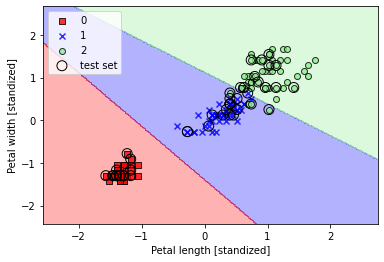

In [11]:
from sklearn.svm import SVC
svm = SVC(kernel = 'linear', C=0.1, random_state = 42)
svm.fit(x_train_std, y_train)

print('train accuracy =', svm.score(x_train_std, y_train))
print('test accuracy =', svm.score(x_test_std, y_test))

plot_decision_regions(X_combined_std, y_combined, classifier = svm, test_idx = range(105, 150))
plt.xlabel('Petal length [standized]')
plt.ylabel('Petal width [standized]')
plt.legend()
plt.show()

----
### 참고. SGDClassifier의 loss함수 옵션을 통한 알고리즘 선택 방법 
- from sklearn.linear_model import SGDClassifier
  - ppn = SGDClassifier(loss='perceptron')
  - lr = SGDClassifier(loss='log')
  - svm = SGDClassifier(loss='hinge')
----

train accuracy = 0.9809523809523809
test accuracy = 0.9111111111111111


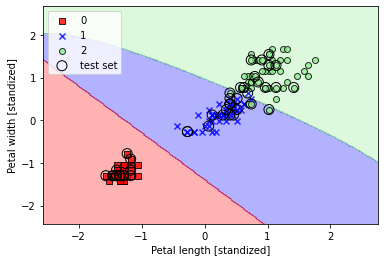

In [12]:
## rbf : 비선형 분류 
## gamma : 가우시안 구의 크기를 제한, 값이 커지면 결정경계가 샘플에 가깝게 더욱 구불구불 해짐 (overfitting 우려 높아짐)
svm = SVC(kernel = 'rbf', C=1, random_state = 42, gamma = 0.2)
svm.fit(x_train_std, y_train)

print('train accuracy =', svm.score(x_train_std, y_train))
print('test accuracy =', svm.score(x_test_std, y_test))

plot_decision_regions(X_combined_std, y_combined, classifier = svm, test_idx = range(105, 150))
plt.xlabel('Petal length [standized]')
plt.ylabel('Petal width [standized]')
plt.legend()
plt.show()

train accuracy = 0.9809523809523809
test accuracy = 0.9111111111111111


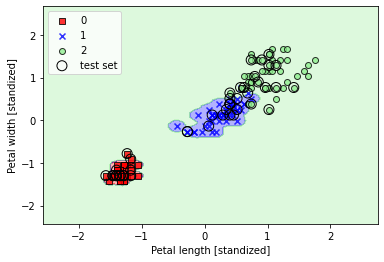

In [13]:
svm = SVC(kernel = 'rbf', C=1, random_state = 42, gamma = 100)
svm.fit(x_train_std, y_train)

print('train accuracy =', svm.score(x_train_std, y_train))
print('test accuracy =', svm.score(x_test_std, y_test))

plot_decision_regions(X_combined_std, y_combined, classifier = svm, test_idx = range(105, 150))
plt.xlabel('Petal length [standized]')
plt.ylabel('Petal width [standized]')
plt.legend()
plt.show()

- 즉 알고리즘이 훈련데이터셋에 너무 민감하게 반응하여 overfitting이 우려된다면, gamma값을 조정함으로써 대체할 수 있다. 
----

#### 4. Decision Tree 
- 트리 분리 기준으로 1) Entropy(혼잡도)와, 2) Gini 불순도 계수(오분류 확률)을 사용한다. --> default = gini 
- 트리의 깊이 max_depth의 기본값은 None, 즉 모든 리프노드가 순수해질때 까지 트리가 성장한다. 
- max_features의 기본값은 None, 즉 모든 변수를 사용한다. (사용자가 특성의 갯수나 비율, 그리고 연산방법(sqrt, log2)를 지정할 수 있다.)  
---- 

train accuracy = 0.9809523809523809
test accuracy = 0.9555555555555556


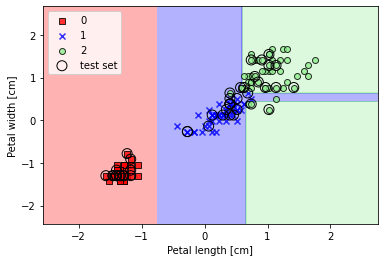

In [14]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion = 'gini', max_depth = 4, random_state = 42)
tree.fit(x_train_std, y_train)

print('train accuracy =', tree.score(x_train_std, y_train))
print('test accuracy =', tree.score(x_test_std, y_test))

## tree모델은 변수 표준화가 불필요 
X_combined = np.vstack((x_train, x_test))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X_combined_std, y_combined, classifier = tree, test_idx = range(105, 150))
plt.xlabel('Petal length [cm]')
plt.ylabel('Petal width [cm]')
plt.legend()
plt.show()

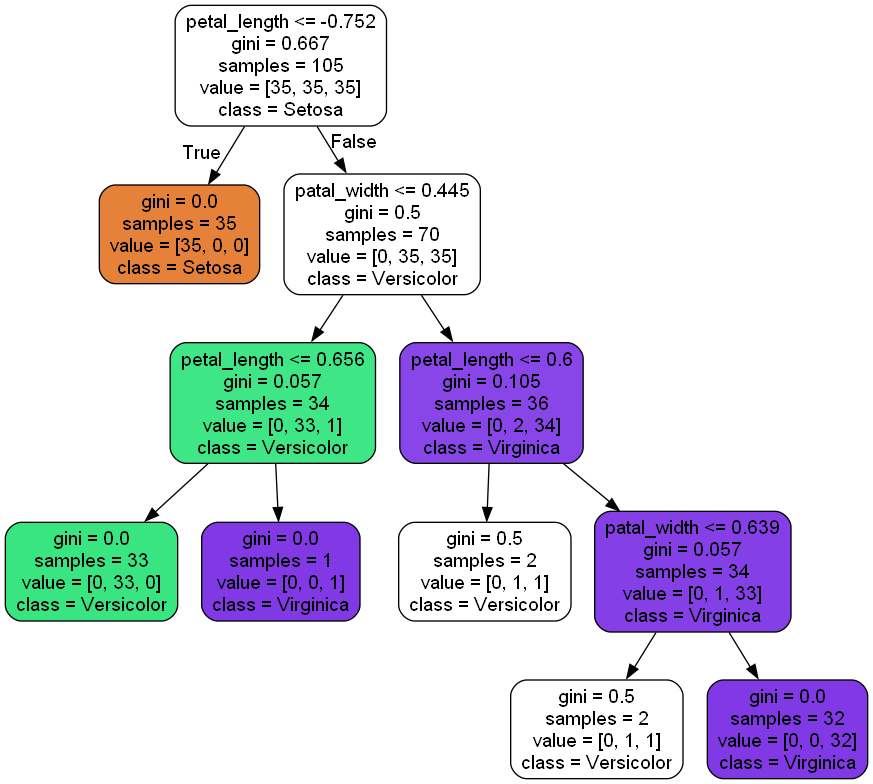

In [15]:
## graphviz tree 이미지 만들기
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
dot_data = export_graphviz(tree, filled = True, rounded = True, ## 색깔칠하기, 모서리 라운드처리 
                           class_names = ['Setosa', 'Versicolor', 'Virginica'], 
                           feature_names = ['petal_length', 'patal_width'])
graph = graph_from_dot_data(dot_data)
graph.write_png('img/tree.png')

from IPython.display import Image
Image('img/tree.png', width=600)

train accuracy = 0.9904761904761905
test accuracy = 0.9555555555555556


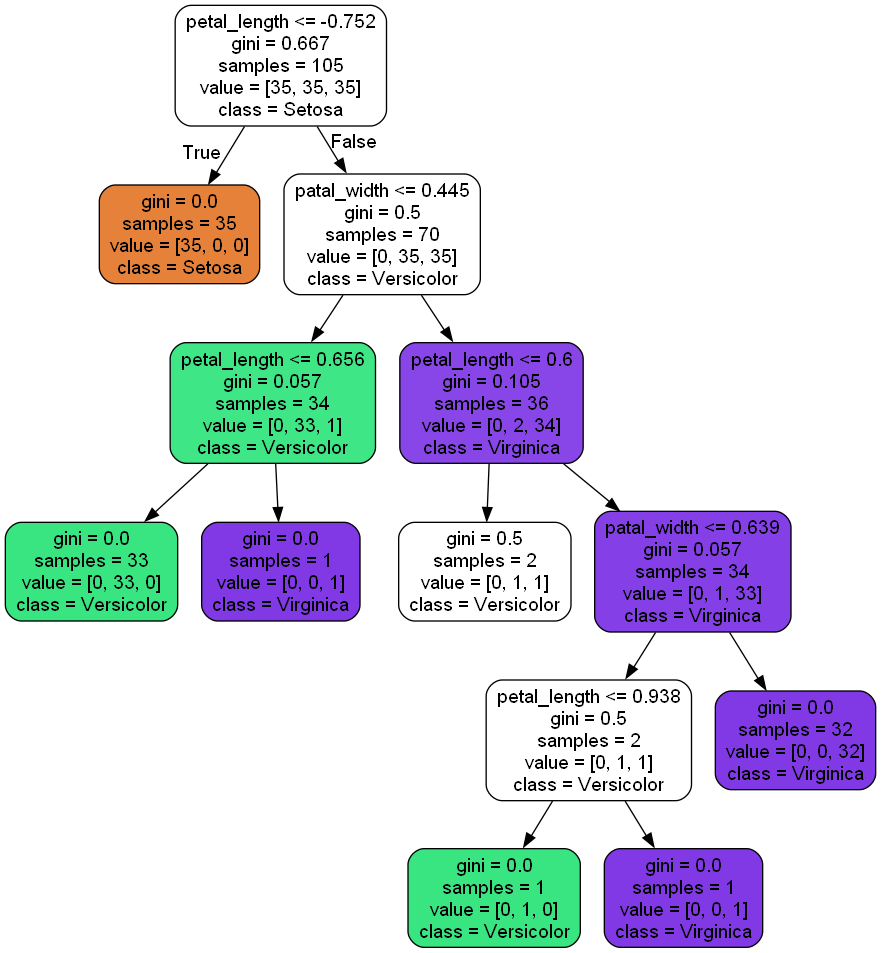

In [16]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state = 42) ## max_depth = 무제한 
tree.fit(x_train_std, y_train)

print('train accuracy =', tree.score(x_train_std, y_train))
print('test accuracy =', tree.score(x_test_std, y_test))

## tree모델은 변수 표준화가 불필요 
X_combined = np.vstack((x_train, x_test))
y_combined = np.hstack((y_train, y_test))

## graphviz tree 이미지 만들기
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
dot_data = export_graphviz(tree, filled = True, rounded = True, ## 색깔칠하기, 모서리 라운드처리 
                           class_names = ['Setosa', 'Versicolor', 'Virginica'], 
                           feature_names = ['petal_length', 'patal_width'])
graph = graph_from_dot_data(dot_data)
graph.write_png('img/tree.png')

from IPython.display import Image
Image('img/tree.png', width=600)

----
#### 5. Random Forest 
- tree모델에 비해 직관적 해석은 어려우나, hyper_parameters 튜닝에 노력이 적게 든다는 장점 
- 만들 tree의 갯수만 지정하면 된다. (앙상블 모델이라 개별 트리가 만드는 noise의 영향이 잘 중화되므로) 
----

train accuracy = 0.9904761904761905
test accuracy = 0.9555555555555556


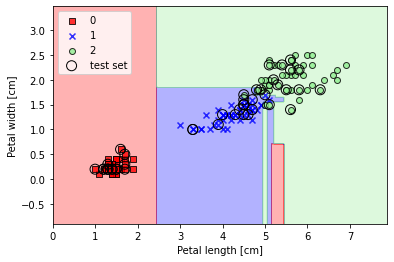

In [19]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion = 'gini', n_estimators = 25, random_state = 42) ## tree갯수 = 25개
forest.fit(x_train, y_train)

print('train accuracy =', forest.score(x_train, y_train))
print('test accuracy =', forest.score(x_test, y_test))

plot_decision_regions(X_combined, y_combined, classifier = forest, test_idx = range(105, 150))
plt.xlabel('Petal length [cm]')
plt.ylabel('Petal width [cm]')
plt.legend()
plt.show()

---
#### 6. KNN 
- tree, knn 모델 사용시 차원의 저주에 의한 overfitting에 주의 
- 차원의 저주 : 차원이 증가하면서 학습데이터 수가 차원 수보다 적어져서 성능이 저하되는 현상. 차원이 증가할수록 변수가 증가하고, 개별 차원 내에서 학습할 데이터 수가 적어진다. 
- Regression의 라쏘규제와 같은 규제방법이 없으므로, 필요한 변수만 선택하거나 PCA로 차원축소 하는 것이 일반적임
---

train accuracy = 0.3333333333333333
test accuracy = 0.3333333333333333


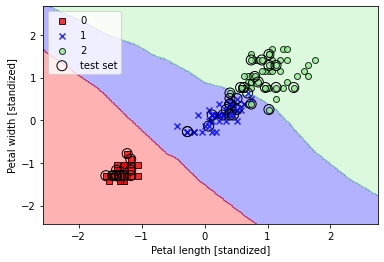

In [20]:
from sklearn.neighbors import KNeighborsClassifier

## 거리기준 지정 : p=1 ~ 유클리디안 거리, p=2 ~ 맨해튼 거리 / minkowski : p1과 p2를 일반화한 것 
## default : p = -2, metric = 'minkowski' 
knn = KNeighborsClassifier(n_neighbors = 5, p=2, metric = 'minkowski')

knn.fit(x_train_std, y_train)

print('train accuracy =', knn.score(x_train, y_train))
print('test accuracy =', knn.score(x_test, y_test))

plot_decision_regions(X_combined_std, y_combined, classifier = knn, test_idx = range(105, 150))
plt.xlabel('Petal length [standized]')
plt.ylabel('Petal width [standized]')
plt.legend()
plt.show()